In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from textwrap import wrap
import numpy as np

In [67]:
df = pd.read_csv('ufc_fight_results.csv')
df.head(5)

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL
0,UFC Fight Night: Cannonier vs. Borralho,Jared Cannonier vs. Caio Borralho,L/W,Middleweight Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Dan Miragliotta,Sal D'amato 45 - 49.Ron McCarthy 45 - 49.Chris...,http://ufcstats.com/fight-details/15805ae1eea3...
1,UFC Fight Night: Cannonier vs. Borralho,Angela Hill vs. Tabatha Ricci,L/W,Women's Strawweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Keith Peterson,Mike Bell 28 - 29.Ben Cartlidge 28 - 29.Eric C...,http://ufcstats.com/fight-details/70afe9e0d242...
2,UFC Fight Night: Cannonier vs. Borralho,Robert Valentin vs. Ryan Loder,L/W,Middleweight Bout,KO/TKO,2,1:49,3 Rnd + OT (5-5-5-5),Mark Smith,Elbows to Head From Crucifix,http://ufcstats.com/fight-details/5c5523a6bf83...
3,UFC Fight Night: Cannonier vs. Borralho,Kaan Ofli vs. Mairon Santos,L/W,Featherweight Bout,KO/TKO,2,1:30,3 Rnd + OT (5-5-5-5),Chris Tognoni,Punch to Head At Distance,http://ufcstats.com/fight-details/bad06a5380d7...
4,UFC Fight Night: Cannonier vs. Borralho,Neil Magny vs. Michael Morales,L/W,Welterweight Bout,KO/TKO,1,4:39,3 Rnd (5-5-5),Dan Miragliotta,Punches to Head From Back Control,http://ufcstats.com/fight-details/ae50a1a655b1...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788 entries, 0 to 7787
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EVENT        7788 non-null   object
 1   BOUT         7788 non-null   object
 2   OUTCOME      7788 non-null   object
 3   WEIGHTCLASS  7788 non-null   object
 4   METHOD       7788 non-null   object
 5   ROUND        7788 non-null   int64 
 6   TIME         7788 non-null   object
 7   TIME FORMAT  7788 non-null   object
 8   REFEREE      7755 non-null   object
 9   DETAILS      7713 non-null   object
 10  URL          7788 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.4+ KB


In [4]:
df['WEIGHTCLASS'].unique()

array(['Middleweight Bout', "Women's Strawweight Bout",
       'Featherweight Bout', 'Welterweight Bout', 'Lightweight Bout',
       "Women's Bantamweight Bout", "Women's Flyweight Bout",
       'UFC Middleweight Title Bout', 'Flyweight Bout',
       'Heavyweight Bout', 'Bantamweight Bout', 'Light Heavyweight Bout',
       'UFC Welterweight Title Bout',
       'UFC Interim Heavyweight Title Bout',
       'UFC Light Heavyweight Title Bout', 'Catch Weight Bout',
       'UFC Lightweight Title Bout', 'UFC Flyweight Title Bout',
       "UFC Women's Strawweight Title Bout",
       'UFC Bantamweight Title Bout', 'UFC Featherweight Title Bout',
       "UFC Women's Bantamweight Title Bout",
       "UFC Women's Flyweight Title Bout", "Women's Featherweight Bout",
       'UFC Heavyweight Title Bout',
       'UFC Interim Featherweight Title Bout',
       'UFC Interim Flyweight Title Bout',
       'UFC Interim Bantamweight Title Bout',
       "UFC Women's Featherweight Title Bout",
       'UFC Inte

In [33]:
len(df['WEIGHTCLASS'].unique())

109

In [5]:
# List of Weight Classes to Include
weight_classes = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                  'Middleweight', 'Light Heavyweight', 'Heavyweight', 
                  "Women's Strawweight", "Women's Flyweight", "Women's Bantamweight", 
                  "Women's Featherweight"]

# Combine the Weight Class category into one regex pattern
pattern = '|'.join(weight_classes)

# Extract only the key words relevant in the column WEIGHTCLASS
df['WEIGHTCLASS_CLEAN'] = df['WEIGHTCLASS'].str.extract(f'({pattern})', expand=False)

# Drop other rows that doesn't include relevant Weightclass
df_cleaned = df.dropna(subset=['WEIGHTCLASS_CLEAN'])

# Print the results
print(df_cleaned['WEIGHTCLASS_CLEAN'].unique())

['Middleweight' "Women's Strawweight" 'Featherweight' 'Welterweight'
 'Lightweight' "Women's Bantamweight" "Women's Flyweight" 'Flyweight'
 'Heavyweight' 'Bantamweight' 'Light Heavyweight' "Women's Featherweight"]


In [68]:
# Count each WEIGHTCLASS fights
weightclass_counts = df_cleaned['WEIGHTCLASS_CLEAN'].value_counts().reset_index()
weightclass_counts

,WEIGHTCLASS_CLEAN,count
0,Lightweight,1336
1,Welterweight,1294
2,Featherweight,752
3,Heavyweight,712
4,Light Heavyweight,690
5,Bantamweight,675
6,Flyweight,342
7,Women's Strawweight,311
8,Women's Flyweight,231
9,Women's Bantamweight,210


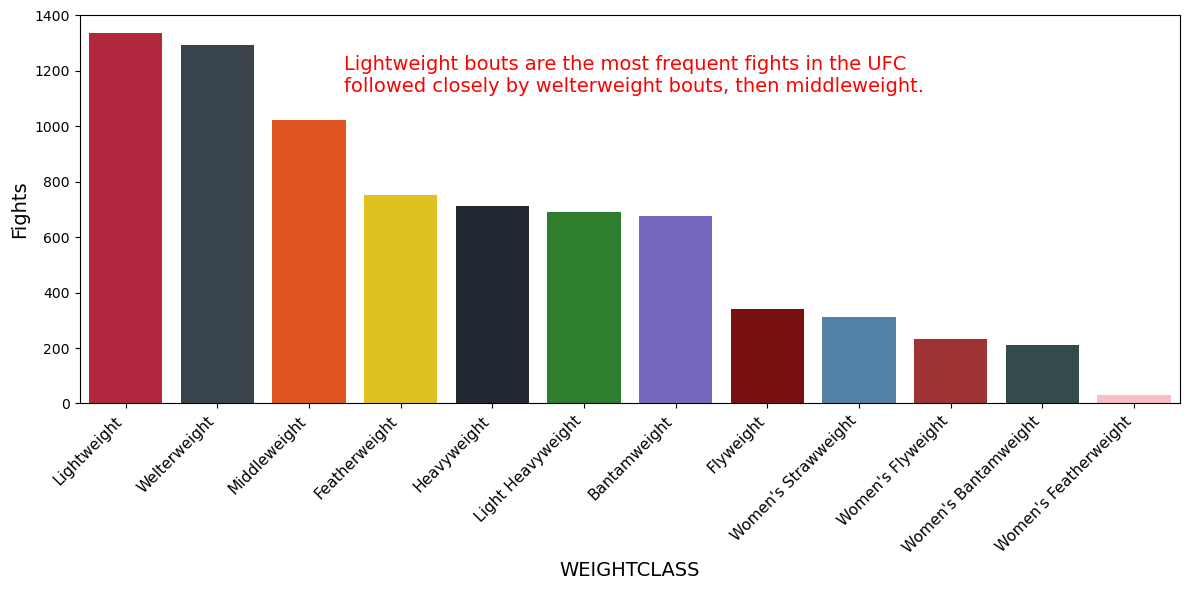

In [6]:
plt.figure(figsize=(12, 6)) 

# Suppress specific warnings related to Seaborn palette usage
warnings.filterwarnings("ignore", category=FutureWarning, message="Passing `palette` without assigning `hue` is deprecated")
warnings.filterwarnings("ignore", category=UserWarning, message="The palette list has fewer values")

# Count each WEIGHTCLASS of winning
weightclass_counts = df_cleaned['WEIGHTCLASS_CLEAN'].value_counts().reset_index()
weightclass_counts.columns = ['WEIGHTCLASS_CLEAN', 'Count']

# Create bar plot using Seaborn 
colors = ['#C8102E', '#36454F', '#FF4500', '#FFD700', '#1F2833', '#228B22', 
          '#6A5ACD', '#8B0000', '#4682B4', '#B22222', '#2F4F4F', 
          '#FFB6C1', '#DB7093', '#FFD1DC', '#C71585']
sns.barplot(x='WEIGHTCLASS_CLEAN', y='Count', data=weightclass_counts, palette=colors)

# Add custom text 
plt.text(0.24, 0.8, 
    "Lightweight bouts are the most frequent fights in the UFC \n"
    "followed closely by welterweight bouts, then middleweight.",
    transform=plt.gca().transAxes, 
    fontsize=14, 
    color='red', 
    horizontalalignment='left')

# Add labels and adjust layout
plt.xlabel('WEIGHTCLASS', fontsize = 14)
plt.ylabel('Fights', fontsize = 14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha="right", fontsize = 11)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
# Count each METHOD of winning
method_counts = df['METHOD'].value_counts().reset_index()
method_counts

,METHOD,count
0,Decision - Unanimous,2753
1,KO/TKO,2459
2,Submission,1534
3,Decision - Split,753
4,TKO - Doctor's Stoppage,92
5,Decision - Majority,92
6,Overturned,52
7,Could Not Continue,27
8,DQ,23
9,Other,3


In [64]:
filtered_df = df[df['METHOD'] == 'Other ']
filtered_df

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL
1486,UFC Fight Night: Santos vs. Walker,Kevin Holland vs. Kyle Daukaus,NC/NC,Middleweight Bout,Other,1,3:43,3 Rnd (5-5-5),Dan Miragliotta,Accidental Headbutt,http://ufcstats.com/fight-details/ce151e053721...
7727,UFC 7: The Brawl in Buffalo,Ken Shamrock vs. Oleg Taktarov,D/D,UFC Superfight Championship Bout,Other,2,3:00,1 Rnd + OT (30-3),John McCarthy,Time Expired,http://ufcstats.com/fight-details/3932f8e9a74f...
7748,UFC 5: The Return of the Beast,Ken Shamrock vs. Royce Gracie,D/D,UFC Superfight Championship Bout,Other,2,5:00,1 Rnd + OT (31-5),John McCarthy,Time Expired,http://ufcstats.com/fight-details/db8df615610f...


In [61]:
print(df['METHOD'].unique())

['Decision - Unanimous ' 'KO/TKO ' 'Submission ' 'Decision - Split '
 "TKO - Doctor's Stoppage " 'Could Not Continue ' 'Decision - Majority '
 'DQ ' 'Overturned ' 'Other ']


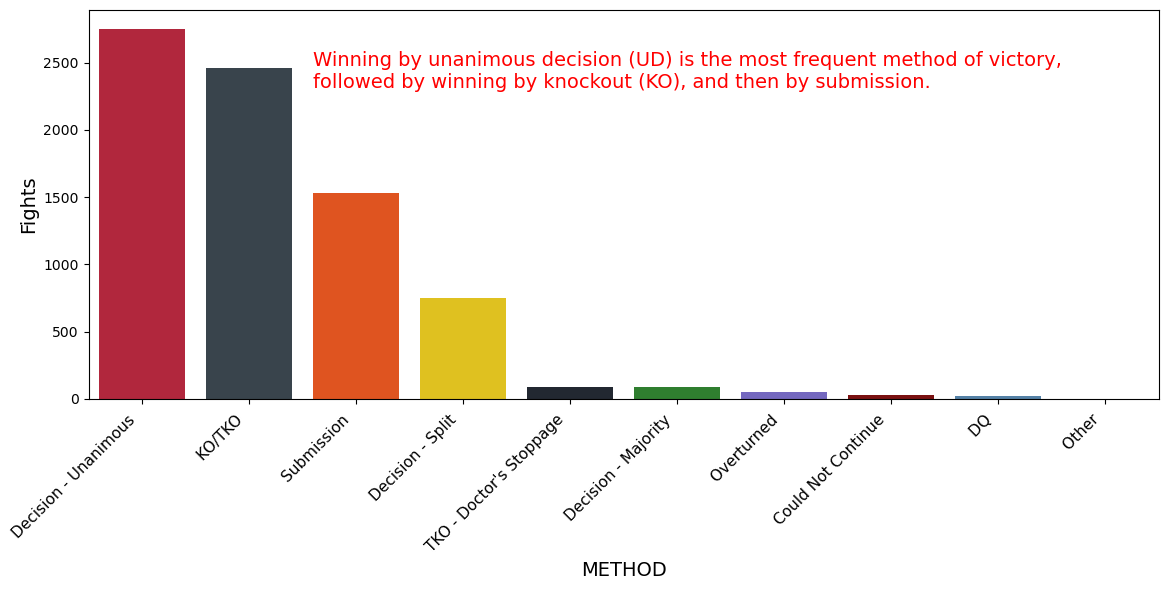

In [42]:
plt.figure(figsize=(12, 6)) 

# Suppress specific warnings related to Seaborn palette usage
warnings.filterwarnings("ignore", category=FutureWarning, message="Passing `palette` without assigning `hue` is deprecated")
warnings.filterwarnings("ignore", category=UserWarning, message="The palette list has fewer values")

# Count each METHOD of winning
method_counts = df['METHOD'].value_counts().reset_index()
method_counts.columns = ['METHOD', 'Count']

# Create bar plot using Seaborn 
colors = ['#C8102E', '#36454F', '#FF4500', '#FFD700', '#1F2833', '#228B22', '#6A5ACD', '#8B0000', '#4682B4', '#B22222']  
sns.barplot(x='METHOD', y='Count', data=method_counts, palette=colors)

# Add custom text 
plt.text(0.21, 0.8, 
    "Winning by unanimous decision (UD) is the most frequent method of victory,\n"
    "followed by winning by knockout (KO), and then by submission.",
    transform=plt.gca().transAxes, 
    fontsize=14, 
    color='red', 
    horizontalalignment='left')

# Add labels and adjust layout
plt.xlabel('METHOD', fontsize = 14)
plt.ylabel('Fights', fontsize = 14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha="right", fontsize = 11)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
method_per_weightclass = df.groupby(['WEIGHTCLASS_CLEAN', 'METHOD']).size().reset_index(name='Count')
method_per_weightclass

,WEIGHTCLASS_CLEAN,METHOD,Count
0,Bantamweight,Could Not Continue,5
1,Bantamweight,DQ,1
2,Bantamweight,Decision - Majority,8
3,Bantamweight,Decision - Split,77
4,Bantamweight,Decision - Unanimous,256
...,...,...,...
91,Women's Strawweight,Decision - Split,46
92,Women's Strawweight,Decision - Unanimous,156
93,Women's Strawweight,KO/TKO,38
94,Women's Strawweight,Submission,61


In [10]:
df_cleaned['METHOD'].unique()

array(['Decision - Unanimous ', 'KO/TKO ', 'Submission ',
       'Decision - Split ', "TKO - Doctor's Stoppage ",
       'Could Not Continue ', 'Decision - Majority ', 'DQ ',
       'Overturned ', 'Other '], dtype=object)

In [11]:
# Define the replacements for the 'METHOD' column
replacements = {
    'KO/TKO ': 'KO/TKO',
    "TKO - Doctor's Stoppage ": 'KO/TKO',
    'Decision - Unanimous ': 'Decision',
    'Decision - Split ': 'Decision',
    'Decision - Majority ': 'Decision',
    'Submission ': 'Submission',
    'Could Not Continue ': 'Other',
    'DQ ': 'Other',
    'Overturned ': 'Other',
    'Other ': 'Other'
}

# Apply replacements to the 'METHOD' column
df_cleaned['METHOD_CLEAN'] = df_cleaned['METHOD'].replace(replacements)

# Check unique values
print(df_cleaned['METHOD_CLEAN'].unique())

['Decision' 'KO/TKO' 'Submission' 'Other']


In [74]:
# Define the desired order of weight classes
weightclass_order = ['Women\'s Strawweight', 'Women\'s Flyweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
                     'Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                     'Light Heavyweight', 'Heavyweight']

# Convert 'WEIGHTCLASS_CLEAN' to a categorical type with the specified order
df_cleaned['WEIGHTCLASS_CLEAN'] = pd.Categorical(df_cleaned['WEIGHTCLASS_CLEAN'], categories=weightclass_order, ordered=True)

# Count the distribution of each WEIGHTCLASS per METHOD
weightclass_method_counts = df_cleaned.groupby(['WEIGHTCLASS_CLEAN', 'METHOD_CLEAN']).size().reset_index(name='Count')

# Pivot data so that the METHOD be the column, and WEIGHTCLASS be the rows
pivot_df = weightclass_method_counts.pivot_table(index='WEIGHTCLASS_CLEAN', columns='METHOD_CLEAN', values='Count', fill_value=0)

# Count the percentage of each (WEIGHTCLASS_CLEAN)
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
pivot_df_percentage

METHOD_CLEAN,Decision,KO/TKO,Other,Submission
WEIGHTCLASS_CLEAN,,,,
Women's Strawweight,66.559486,13.183280,0.643087,19.614148
Women's Flyweight,62.337662,16.883117,0.000000,20.779221
Women's Bantamweight,60.476190,22.857143,0.476190,16.190476
Women's Featherweight,55.172414,24.137931,0.000000,20.689655
Flyweight,54.093567,24.269006,0.877193,20.760234
Bantamweight,50.518519,27.407407,2.074074,20.000000
Featherweight,54.122340,27.792553,1.196809,16.888298
Lightweight,47.829341,29.041916,1.122754,22.005988
Welterweight,47.681607,32.148377,1.313756,18.856260


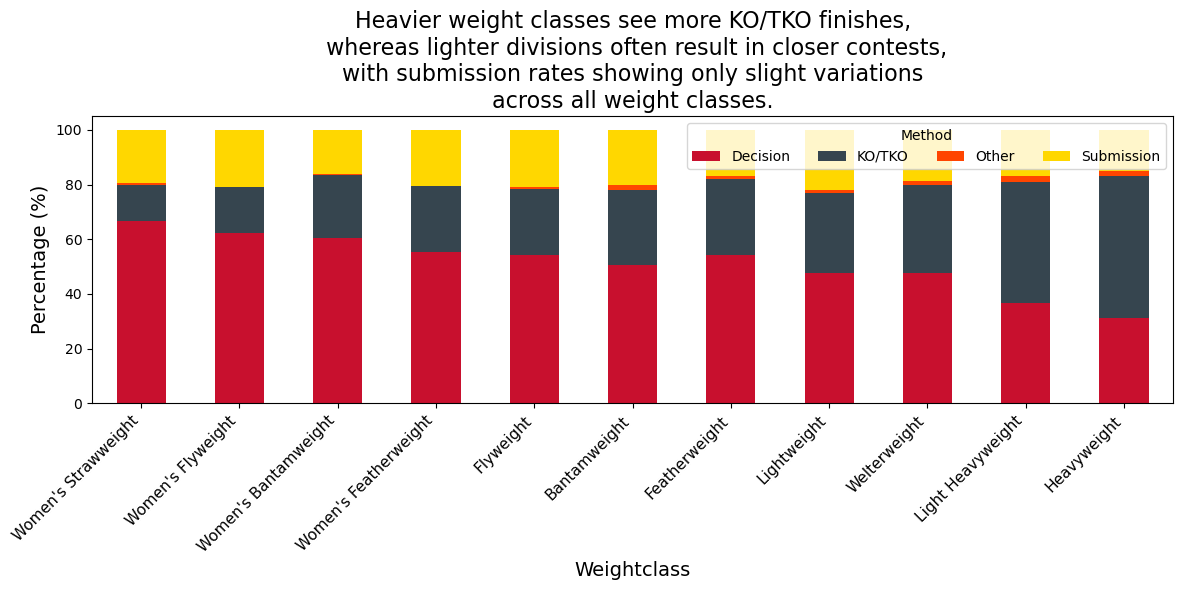

In [73]:
# Define the desired order of weight classes
weightclass_order = ['Women\'s Strawweight', 'Women\'s Flyweight', 'Women\'s Bantamweight', 'Women\'s Featherweight',
                     'Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                     'Light Heavyweight', 'Heavyweight']

# Convert 'WEIGHTCLASS_CLEAN' to a categorical type with the specified order
df_cleaned['WEIGHTCLASS_CLEAN'] = pd.Categorical(df_cleaned['WEIGHTCLASS_CLEAN'], categories=weightclass_order, ordered=True)

# Count the distribution of each WEIGHTCLASS per METHOD
weightclass_method_counts = df_cleaned.groupby(['WEIGHTCLASS_CLEAN', 'METHOD_CLEAN']).size().reset_index(name='Count')

# Pivot data so that the METHOD be the column, and WEIGHTCLASS be the rows
pivot_df = weightclass_method_counts.pivot_table(index='WEIGHTCLASS_CLEAN', columns='METHOD_CLEAN', values='Count', fill_value=0)

# Count the percentage of each (WEIGHTCLASS_CLEAN)
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Warna untuk segmen
colors = ['#C8102E', '#36454F', '#FF4500', '#FFD700', '#228B22', '#4682B4', '#8A2BE2', '#D2691E', '#FF69B4', '#6A5ACD']

# Buat stacked bar chart untuk persentase
pivot_df_percentage.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

# Tambahkan label dan atur layout
plt.xlabel('Weightclass', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title("Heavier weight classes see more KO/TKO finishes,\n whereas lighter divisions often result in closer contests,\nwith submission rates showing only slight variations\nacross all weight classes.", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=11)

# Tambahkan legenda untuk METHODS
plt.legend(title='Method', ncol=6)

# Tampilkan plot
plt.tight_layout()
plt.show()